In [8]:
import pickle
import numpy as np
import pandas as pd
    # Модуль pickle предоставляет мощный алгоритм сериализации и десериализации структур данных Python. Pickling — это процесс, при котором иерархия объекта конвертируется в поток байтов.

    # Это позволяет переносить и хранить объект, так что получатель может восстановить его, сохранив все оригинальные черты.

data = { 'color': ['white','red'], 'value': [5, 7]}
pickled_data = pickle.dumps(data)
    # выполняем сериализацию с помощью dumps
print(pickled_data)

frame = pickle.loads(pickled_data)
    # здесь мы выполняем десериализацию с помощью loads
frame

b'\x80\x04\x95/\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x05color\x94]\x94(\x8c\x05white\x94\x8c\x03red\x94e\x8c\x05value\x94]\x94(K\x05K\x07eu.'


{'color': ['white', 'red'], 'value': [5, 7]}

In [11]:
import pickle
import numpy as np
import pandas as pd

frame = pd.DataFrame(np.arange(16).reshape(4,4), index=['up','down','left','right'])
frame.to_pickle('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\my_dataset\\pickle_frame.pkl')

pd.read_pickle('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\my_dataset\\pickle_frame.pkl')

,0,1,2,3
up,0,1,2,3
down,4,5,6,7
left,8,9,10,11
right,12,13,14,15


In [12]:
import numpy as np
import pandas as pd

frame1 = pd.DataFrame({'id':['ball','pencil','pen','mug','ashtray'], 'price': [12.33,11.44,33.21,13.23,33.62]})

frame2 = pd.DataFrame({'id':['pencil','pencil','ball','pen'], 'color': ['white','red','red','black']})

    # выполняем соединение ниже
pd.merge(frame1, frame2)

    # Получившийся объект Dataframe состоит из всех строк с общим ID. В дополнение к общей колонке добавлены и те, что присутствуют только в первом и втором объектах.

    # В этом случае функция merge() была использована без явного определения колонок. Но чаще всего необходимо указывать, на основе какой колонки выполнять соединение.

    # Для этого нужно добавить свойство с названием колонки, которое будет ключом соединения.



,id,price,color
0,ball,12.33,red
1,pencil,11.44,white
2,pencil,11.44,red
3,pen,33.21,black


In [15]:
import numpy as np
import pandas as pd

frame1 = pd.DataFrame({'id':['ball','pencil','pen','mug','ashtray'], 'color': ['white','red','red','black','green'], 'brand': ['OMG','ABC','ABC','POD','POD']})

frame2 = pd.DataFrame({'id':['pencil','pencil','ball','pen'], 'brand': ['OMG','POD','ABC','POD']})

pd.merge(frame1,frame2,on='brand')

,id_x,color,brand,id_y
0,ball,white,OMG,pencil
1,pencil,red,ABC,ball
2,pen,red,ABC,ball
3,mug,black,POD,pencil
4,mug,black,POD,pen
5,ashtray,green,POD,pencil
6,ashtray,green,POD,pen


In [14]:
import numpy as np
import pandas as pd

frame1 = pd.DataFrame({'id':['ball','pencil','pen','mug','ashtray'], 'color': ['white','red','red','black','green'], 'brand': ['OMG','ABC','ABC','POD','POD']})

frame2 = pd.DataFrame({'id':['pencil','pencil','ball','pen'], 'brand': ['OMG','POD','ABC','POD']})


    # Но часто появляется другая проблема, когда есть два Dataframe без колонок с одинаковыми названиями. Для исправления ситуации нужно использовать left_on и right_on, которые определяют ключевые колонки для первого и второго объектов Dataframe.

frame2.columns = ['brand','sid']
frame2

mgn = pd.merge(frame1, frame2, left_on='id', right_on='brand')
mgn

    # По умолчанию функция merge() выполняет inner join (внутреннее соединение). Ключ в финальном объекте — результат пересечения.

    # Другие возможные варианты: left join, right join и outer join (левое, правое и внешнее соединение). Внешнее выполняет объединение всех ключей, комбинируя эффекты правого и левого соединений. Для выбора типа нужно использовать параметр how.

,id,color,brand_x,brand_y,sid
0,ball,white,OMG,ball,ABC
1,pencil,red,ABC,pencil,OMG
2,pencil,red,ABC,pencil,POD
3,pen,red,ABC,pen,POD


![merge_frame2.png](attachment:merge_frame2.png) ![merge_frame1.png](attachment:merge_frame1.png)

In [20]:
import numpy as np
import pandas as pd

frame1 = pd.DataFrame({'id':['ball','pencil','pen','mug','ashtray'], 'color': ['white','red','red','black','green'], 'brand': ['OMG','ABC','ABC','POD','POD']})

frame2 = pd.DataFrame({'id':['pencil','pencil','ball','pen'], 'brand': ['OMG','POD','ABC','POD']})

pd.merge(frame1, frame2, on='id', how='outer')
# pd.merge(frame1, frame2, on='id')

    # Для соединения нескольких ключей, нужно просто в параметр on добавить список.

# pd.merge(frame1,frame2,right_index=True, left_index=True)
    # в этой строке кода
    # **`right_index=True`**: указывает, что вы хотите использовать индекс правого DataFrame (`frame2`) в качестве ключа для объединения. То есть, строки будут сопоставляться по значениям индекса.

    # **`left_index=True`**: Этот параметр указывает, что вы хотите использовать индекс левого DataFrame (`frame1`) в качестве ключа для объединения. Таким образом, строки будут сопоставляться и по значениям индекса левого DataFrame.

    # Но у объектов Dataframe есть и функция join(), которая оказывается особенно полезной, когда необходимо выполнить соединение по индексам. Она же может быть использована для объединения множества объектов с одинаковыми индексами, но без совпадающих колонок.
frame2.columns = ['brand2','id2']
    # Без этой строчки кода будет ошибка, потому что некоторые колонки в объекте frame1 называются так же, как и во frame2. Нужно переименовать их во втором объекте перед использованием join().
frame1.join(frame2)

    # В этом примере соединение было выполнено на основе значений индексов, а не колонок. Также индекс 4 представлен только в объекте frame1, но соответствующие значения колонок во frame2 равняются NaN.

,id,color,brand,brand2,id2
0,ball,white,OMG,pencil,OMG
1,pencil,red,ABC,pencil,POD
2,pen,red,ABC,ball,ABC
3,mug,black,POD,pen,POD
4,ashtray,green,POD,NaN,NaN


In [25]:
import numpy as np
import pandas as pd


    # Еще один тип объединения данных — конкатенация. NumPy предоставляет функцию concatenate() для ее выполнения.

array1 = np.arange(9).reshape((3, 3))
array1

array2 = np.arange(9).reshape((3, 3))+6
array2

np.concatenate([array1, array2], axis=1)
    # производим конкатенацию по оси X
np.concatenate([array1, array2], axis=0)
    # производим конкатенацию по оси Y

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [28]:
import numpy as np
import pandas as pd

ser1 = pd.Series(np.random.rand(4), index=[1,2,3,4])
ser1

ser2 = pd.Series(np.random.rand(4), index=[5,6,7,8])
ser2

pd.concat([ser1, ser2])
    # конкатенация в pandas
    # По умолчанию функция concat() работает на axis=0 и возвращает объект Series. Если задать 1 значением axis, то результатом будет объект Dataframe.

pd.concat([ser1, ser2], axis=1)
    # Проблема с этой операцией в том, что конкатенированные части не определяются в итоговом объекте. Например, нужно создать иерархический индекс на оси конкатенации. Для этого требуется использовать параметр keys.

# |   | 0        | 1        |
# |---|----------|----------|
# | 1 | 0.953608 | NaN      |
# | 2 | 0.929539 | NaN      |
# | 3 | 0.036994 | NaN      |
# | 4 | 0.010650 | NaN      |
# | 5 | NaN      | 0.200771 |
# | 6 | NaN      | 0.709060 |
# | 7 | NaN      | 0.813766 |
# | 8 | NaN      | 0.218998 |

pd.concat([ser1, ser2], keys=[1, 2])
    # В случае объединения двух Series по axis=1 ключи становятся заголовками колонок объекта Dataframe.

1  1    0.986161
   2    0.405373
   3    0.157908
   4    0.283121
2  5    0.293668
   6    0.464930
   7    0.696038
   8    0.480841
dtype: float64

In [31]:
import numpy as np
import pandas as pd

frame1 = pd.DataFrame(np.random.rand(9).reshape(3,3), index=[1,2,3], columns=['A','B','C'])
frame2 = pd.DataFrame(np.random.rand(9).reshape(3,3), index=[4,5,6], columns=['A','B','C'])

pd.concat([frame1, frame2])
    # из этого примера можно увидеть что конкатенация работает даже с объектами типа DataFrame

,A,B,C
1,0.787176,0.137134,0.495963
2,0.454741,0.263694,0.420481
3,0.310603,0.353055,0.595831
4,0.359730,0.973109,0.753481
5,0.536549,0.549959,0.252068
6,0.066152,0.322943,0.308098


In [6]:
import numpy as np
import pandas as pd

    # Есть еще одна ситуация, при которой объединение не работает за счет соединения или конкатенации. Например, если есть два набора данных с полностью или частично пересекающимися индексами.

    # Одна из функций для Series называется combine_first(). Она выполняет объединение с выравниваем данных.

ser1 = pd.Series(np.random.rand(5),index=[1,2,3,4,5])
ser2 = pd.Series(np.random.rand(4),index=[2,4,5,6])
ser1.combine_first(ser2) 
    # в данном примере происходит полное пересечение
ser1[:1].combine_first(ser2[:2])
    # если же необходимо точечное, то указываем необходимые значения

1    0.899830
2    0.209287
4    0.190408
dtype: float64

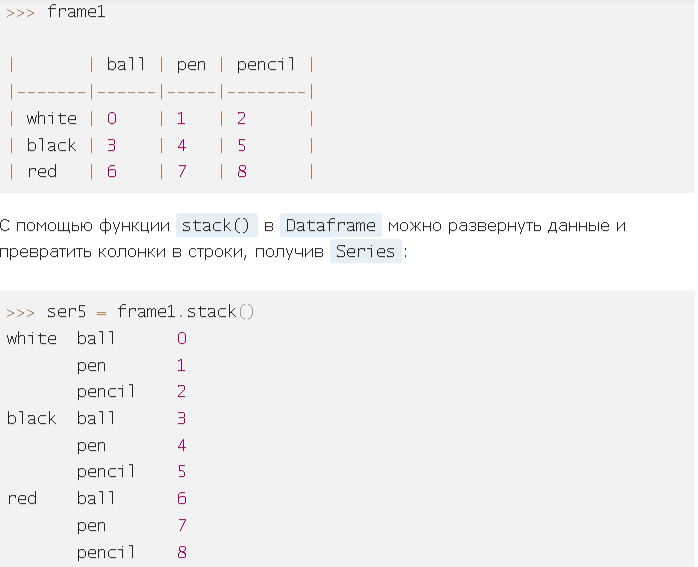

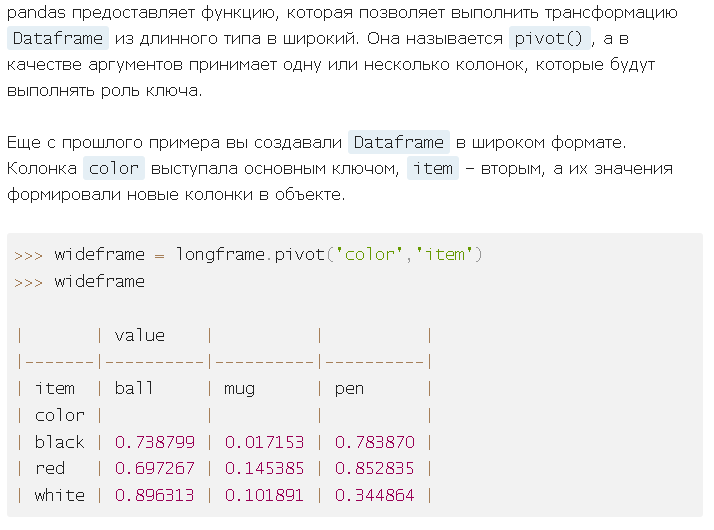

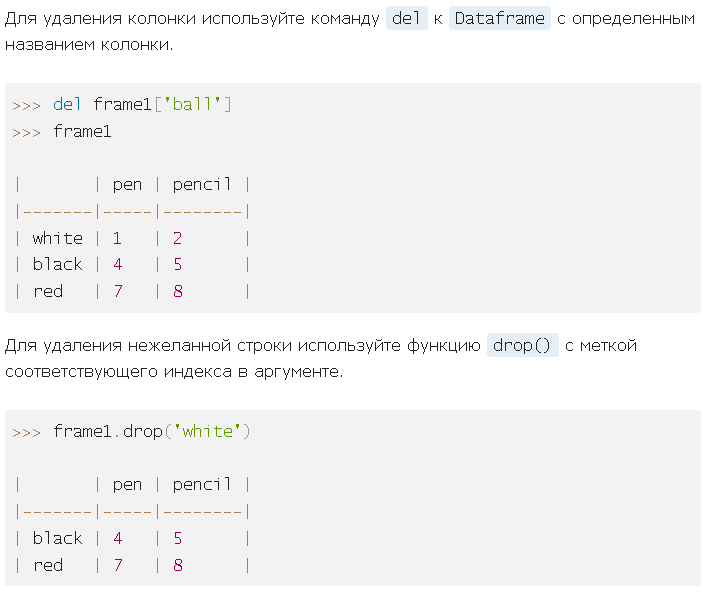